In [1690]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import warnings

warnings.filterwarnings("ignore")

In [1691]:
#loading datasets
df=pd.read_csv("E:\Projects\Encryptix\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1692]:
#displaying shape
df.shape
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1693]:
#displaying 

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1694]:
df.shape

(891, 12)

In [1695]:
#description of dataset
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1696]:
df.size

10692

In [1697]:
df.duplicated().sum()

0

In [1698]:
df.groupby('Survived').mean(numeric_only="TRUE")

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [1699]:
#selecting the numric columns for calcuating correlation
numerical_df = df.select_dtypes(include=['number'])
df_corr = numerical_df.corr()
print(df_corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<Axes: >

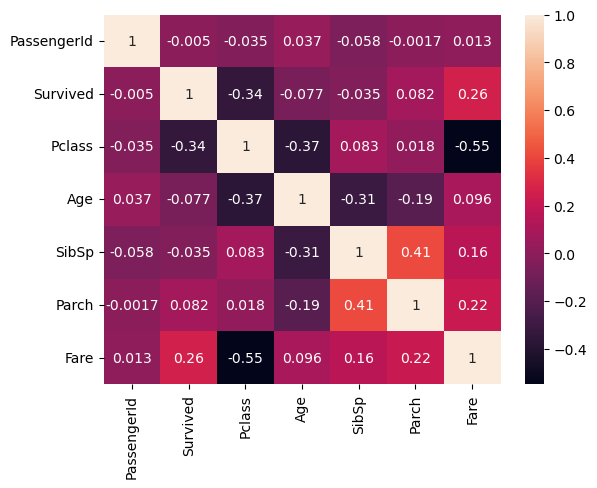

In [1700]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [1701]:
male_ind = len(df[df['Sex'] == 'male'])
print("No of Males in Titanic:",male_ind)
female_ind = len(df[df['Sex'] == 'female'])
print("No of Females in Titanic:",female_ind)

No of Males in Titanic: 577
No of Females in Titanic: 314


In [1702]:
# Cleaning data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1703]:
df.drop(['Ticket','PassengerId', 'Name','SibSp','Parch','Cabin','Embarked'], axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


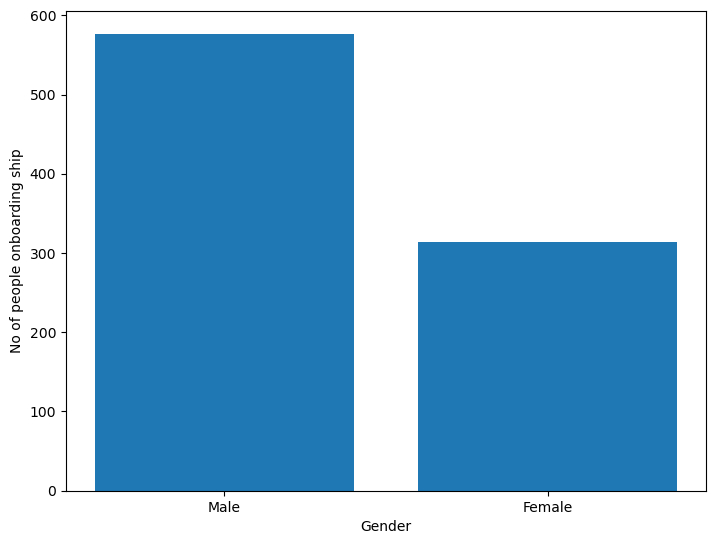

In [1704]:
fig = mp.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
mp.bar(gender,index)
mp.xlabel("Gender")
mp.ylabel("No of people onboarding ship")
mp.show()

In [1705]:
alive = len(df[df['Survived'] == 1])
dead = len(df[df['Survived'] == 0])
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


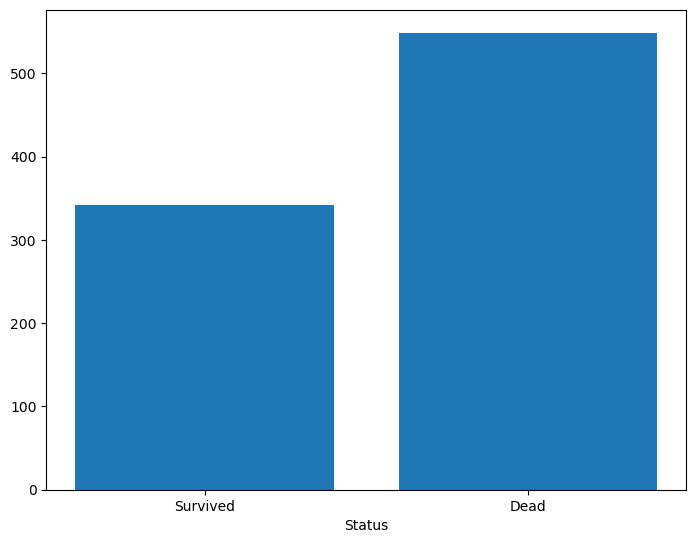

In [1706]:
fig = mp.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
index = [alive,dead]
ax.bar(status,index)
mp.xlabel("Status")
mp.show()

Text(0.5, 1.0, 'Bar graph representing people could not survive according to the ticket class')

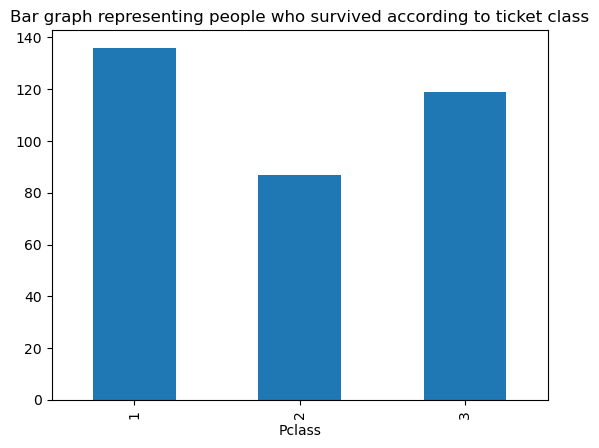

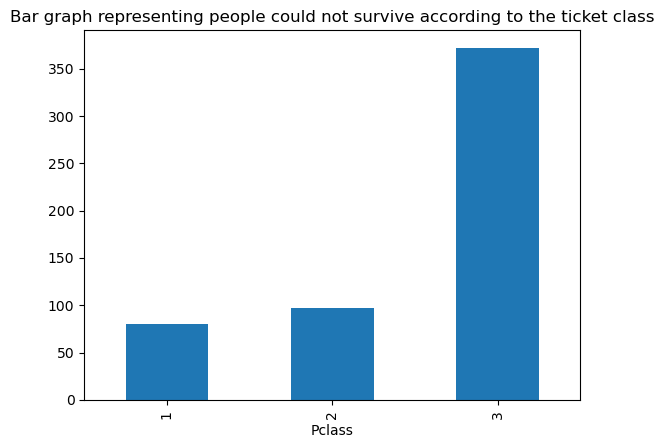

In [1707]:
mp.figure(1)
df.loc[df['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
mp.title('Bar graph representing people who survived according to ticket class')

mp.figure(2)
df.loc[df['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
mp.title('Bar graph representing people could not survive according to the ticket class')

([<matplotlib.axis.XTick at 0x1e4c1c6c200>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

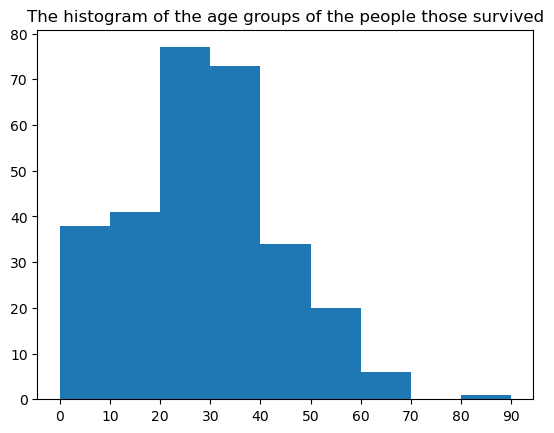

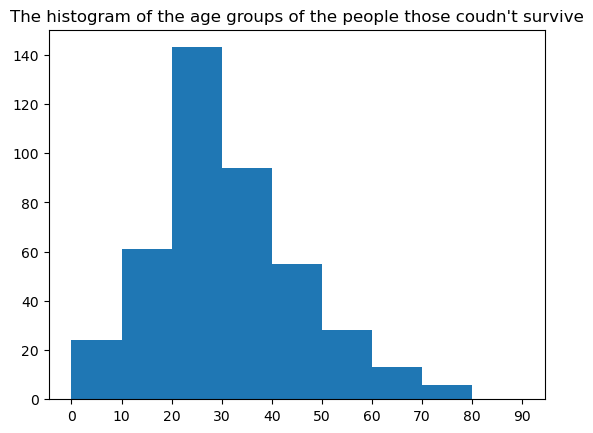

In [1708]:
mp.figure(1)
age  = df.loc[df.Survived == 1, 'Age']
mp.title('The histogram of the age groups of the people those survived')
mp.xticks(np.arange(0,100,10))
mp.hist(age, np.arange(0,100,10))


mp.figure(2)
age  = df.loc[df.Survived == 0, 'Age']
mp.title('The histogram of the age groups of the people those coudn\'t survive')
mp.hist(age, np.arange(0,100,10))
mp.xticks(np.arange(0,100,10))


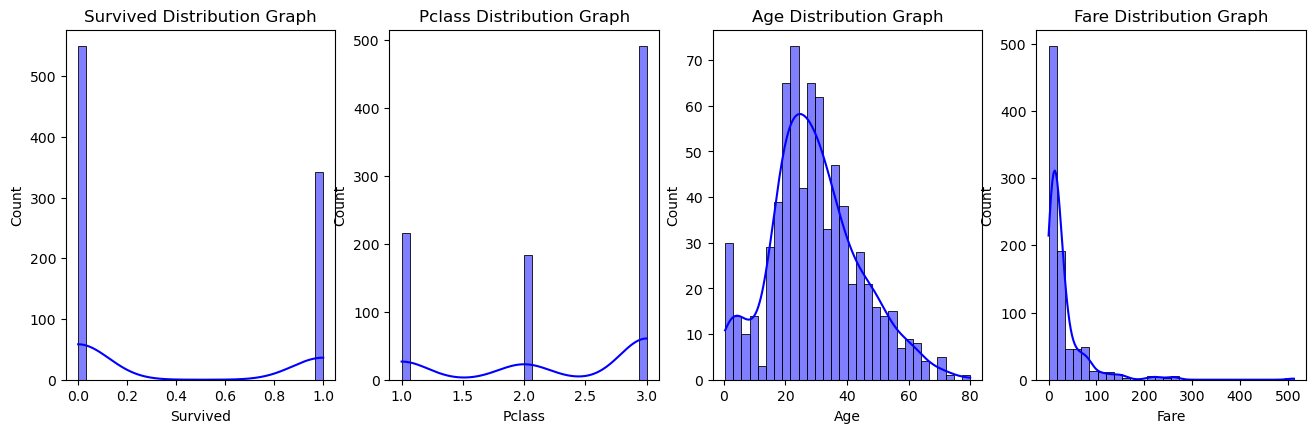

In [1709]:
num_cols = df.select_dtypes("number").columns
mp.figure(figsize=(16,10))
for i, col in enumerate(num_cols):
    mp.subplot(2,4, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    mp.title(f"{col} Distribution Graph")
mp.show()

In [1710]:

X = df.drop("Survived", axis=1)
y = df[["Survived"]]

In [1711]:
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [1712]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [1713]:
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

In [1714]:
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])

In [1715]:
X

,Pclass,Sex,Age,Fare
0,1.0,1,0.271174,0.014151
1,0.0,0,0.472229,0.139136
2,1.0,0,0.321438,0.015469
3,0.0,0,0.434531,0.103644
4,1.0,1,0.434531,0.015713
...,...,...,...,...
886,0.5,1,0.334004,0.025374
887,0.0,0,0.233476,0.058556
888,1.0,0,NaN,0.045771
889,0.0,1,0.321438,0.058556


In [1716]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=35)
# model.fit(X_train, y_train)
# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Now generate confusion matrix for the test set predictions
# cm = confusion_matrix(y_test, y_pred)

In [1718]:
X_train.shape

(712, 4)

In [1719]:
y_train.shape

(712, 1)

In [1720]:
y_test.shape

(179, 1)

In [1721]:
X_test.shape

(179, 4)

In [1722]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [1723]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [1724]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


Confusion Matrix:
[[92 14]
 [17 56]]


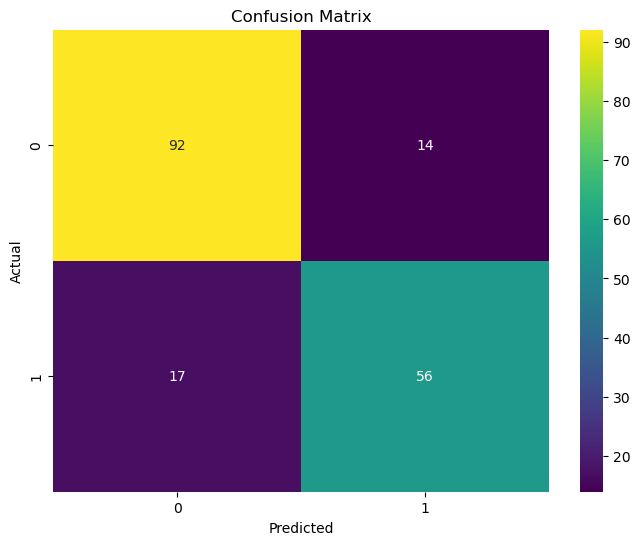

In [1767]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
mp.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d')
mp.title('Confusion Matrix')
mp.xlabel('Predicted')
mp.ylabel('Actual')
mp.show()

In [1726]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       106
           1       0.80      0.77      0.78        73

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

